Text(0.5, 1.0, 'N2')

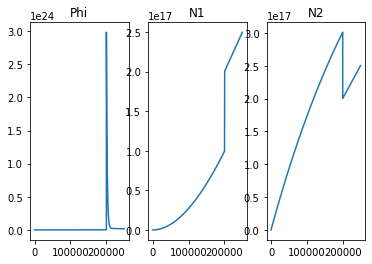

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

A21 = 3E6
A1 = 0
wavelength = 5E-7
sigma = (wavelength*wavelength)/(2*np.pi)
l = 0.1
d = 1.0
RR = .04
c = 2.998E8
stepsize = 1E-12
steps = 250000
p = 1E24

N1_dat = []
N2_dat = []
Phi_dat = []

N1_next = 0
N2_next = 0
Phi_next = 0


def state1(N1,N2,Phi):
    return A21*N2 - A1*N1 + Phi*sigma*(N2-N1) 
def state2(N1,N2,Phi):
    return 2*p - A21*N2 - Phi*sigma*(N2-N1)
def flux(N1,N2,Phi):
    return (c/(2.0*d)) * Phi * (np.log(RR) + 2.0*(N2-N1)*sigma*l)


for i in range(steps):
    #if Phi_next < 1.0:
        #Phi_next = 1.0
    if i == 200000:
        Phi_next = 1.0
    
    N1_dat.append(N1_next)
    N2_dat.append(N2_next)
    Phi_dat.append(Phi_next)
    
    N1 = N1_next
    N2 = N2_next
    Phi = Phi_next
    
    N1_next += (stepsize * state1(N1,N2,Phi))
    N2_next += (stepsize * state2(N1,N2,Phi))
    Phi_next += (stepsize * flux(N1,N2,Phi))
    
x = range(steps)
fig, axis = plt.subplots(1,3)  
axis[0].plot(x,Phi_dat)
axis[0].set_title("Phi")
axis[1].plot(x,N1_dat)
axis[1].set_title("N1")
axis[2].plot(x,N2_dat)
axis[2].set_title("N2")
#plt.savefig("LasterHw6''")